In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import json
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
from collections import Counter
from math import log2
from tqdm import tqdm


In [11]:
!pwd

/Users/affo/itu/sem_6/Bachelor/code/Bach_MRS/lenskit


   user  item  rating  artist  artist_heterogeneity
0     0     1       1    26.0              0.420576
1     0     2       1   107.0              0.420576
2     0     3       1   216.0              0.420576
3     0     5       1   304.0              0.420576
4     0     6       1   315.0              0.420576
     user  item  rating  artist  artist_heterogeneity playlist_length
0       0     1       1    26.0              0.420576          50-100
87      1    13       1   853.0              0.616671         100-150
202     2   290       1   340.0              0.615336          50-100
274     3   393       1   468.0              0.409391          50-100
359     4     5       1   304.0              0.259087          50-100
0.9778334354798579


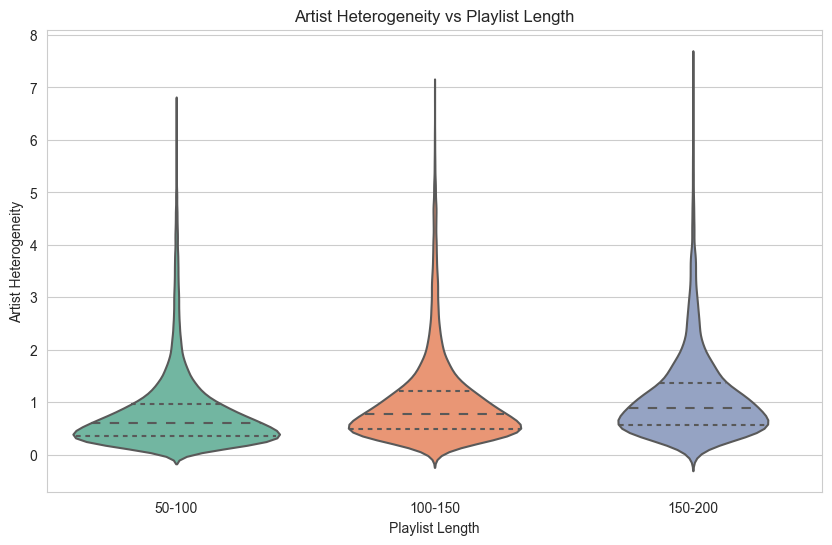

In [47]:
# This function creates a nice seaborn violin plot of the artist heterogeneity vs the length of the playlist, where the playlist lengths is divided into 3 categories : 50-100, 100-150, 150-200
# The data is taken from the AHdata100k.csv file that is created in evaluationfunctions.py
def artist_heterogeneity_scatter():
    inter = pd.read_csv('evaluation/AHdata100k.csv')
    print(inter.head())
    inter['artist_heterogeneity'] = inter['artist_heterogeneity'].astype(float)
    inter['playlist_length'] = inter.groupby('user')['item'].transform('nunique')
    inter = inter.drop_duplicates(subset=['user'])
    inter['playlist_length'] = inter['playlist_length'].astype(int)
    #all playlists have been prefiltered to have at least 50 songs, so we can just divide them into 3 categories
    inter['playlist_length'] = pd.cut(inter['playlist_length'], bins=[50,100,150,200], labels=['50-100', '100-150', '150-200'])
    print(inter.head())
    #calculate the mean artist heterogeneity for each playlist length category
    means = inter.groupby('playlist_length').mean()
    means = means['artist_heterogeneity'].tolist()
    print(np.mean(means))
    #plot this with a violin plot using seaborn where the x axis is the playlist length and the y axis is the artist heterogeneity
    # the plot shows the different bins, such that is a multiplot with len of playlist = 50-100, 100-150, 150-200
    # the plot should be overlayed with a scatterplot of the same data
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.violinplot(x="playlist_length", y="artist_heterogeneity", data=inter, palette="Set2", inner="quartile", alpha=0.5)
    #add the means as a line in each bin in the violin plot to show average artist heterogeneity
    
    #ax = sns.swarmplot(x="playlist_length", y="artist_heterogeneity", data=inter, color="black", alpha=0.5)
    #ax = sns.scatterplot(x="playlist_length", y="artist_heterogeneity", data=inter, alpha=0.5)
    ax.set(xlabel='Playlist Length', ylabel='Artist Heterogeneity')
    plt.title('Artist Heterogeneity vs Playlist Length')
    plt.savefig('../visualisations/artist_heterogeneity_violin.png', dpi=300)
    plt.show()

    return
artist_heterogeneity_scatter()

   user   item  rank  artist  artist_heterogeneity
0     0   4115     1   567.0              0.152003
1     0  17849     2  2014.0              0.152003
2     0  41279     3   966.0              0.152003
3     0  26967     4   514.0              0.152003
4     0  31537     5  2014.0              0.152003
    user  item  rank  artist  artist_heterogeneity  playlist_length
0      0  4115     1   567.0              0.152003               10
10     1  4136     1  2381.0              0.152003               10
20     2  3440     1   354.0              0.152003               10
30     3  1234     1   855.0              0.321928               10
40     4   394     1   603.0              0.000000               10


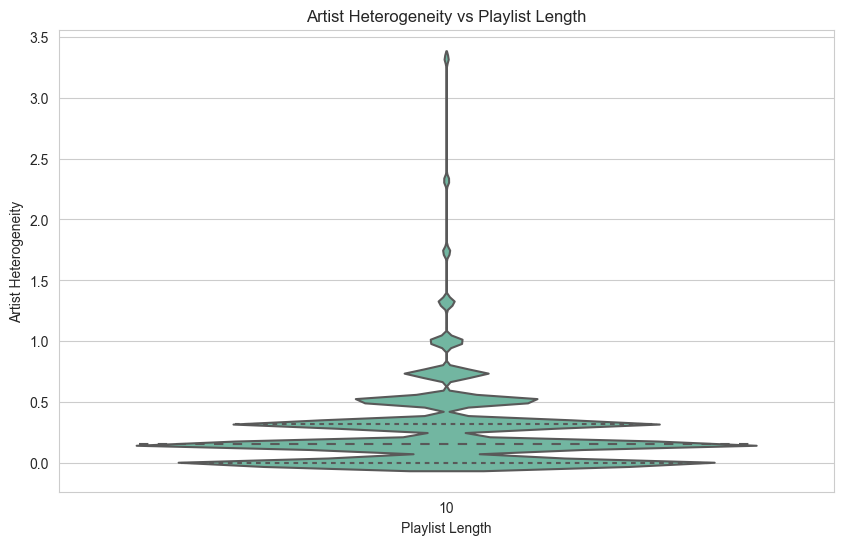

In [13]:
# This function creates a nice seaborn violin plot of the artist heterogeneity vs the length of the playlist, where the playlist lengths is divided into 3 categories : 50-100, 100-150, 150-200
# The data is taken from the AHdata100k.csv file that is created in evaluationfunctions.py
def artist_heterogeneity_scatter():
    inter = pd.read_csv('../recBole/evaluation/AHdataRecommendations.csv')
    print(inter.head())
    inter['artist_heterogeneity'] = inter['artist_heterogeneity'].astype(float)
    inter['playlist_length'] = inter.groupby('user')['item'].transform('nunique')
    inter = inter.drop_duplicates(subset=['user'])
    print(inter.head())
    inter['playlist_length'] = inter['playlist_length'].astype(int)
    #plot this with a violin plot using seaborn where the x axis is the playlist length and the y axis is the artist heterogeneity
    # the plot shows the different bins, such that is a multiplot with len of playlist = 50-100, 100-150, 150-200
    # the plot should be overlayed with a scatterplot of the same data
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))

    ax = sns.violinplot(x="playlist_length", y="artist_heterogeneity", data=inter, palette="Set2", inner="quartile", alpha=0.5)
    #ax = sns.swarmplot(x="playlist_length", y="artist_heterogeneity", data=inter, color="black", alpha=0.5)
    #ax = sns.scatterplot(x="playlist_length", y="artist_heterogeneity", data=inter, alpha=0.5)
    ax.set(xlabel='Playlist Length', ylabel='Artist Heterogeneity')
    plt.title('Artist Heterogeneity vs Playlist Length')
    plt.savefig('../visualisations/artist_heterogeneity_violin.png', dpi=300)
    plt.show()

    return
artist_heterogeneity_scatter()

{'recall@10': 0.2173, 'giniindex': 0.723215043, 'ndcg@10': 0.2422, 'hit@10': 0.78, 'precision@10': 0.1975, 'itemcoverage': 0.00392968258733}
{'recall@10': 0.261112, 'giniindex': 0.61215, 'ndcg@10': 0.26314, 'hit@10': 0.81, 'precision@10': 0.2315, 'itemcoverage': 0.0042590162}
{'recall@10': 0.247112, 'giniindex': 0.5201524, 'ndcg@10': 0.2539, 'hit@10': 0.78, 'precision@10': 0.21562, 'itemcoverage': 0.00431285575}
{'recall@10': 0.09909566666666668, 'precision@10': 0.09692100000000002, 'hit@10': 0.5582799911499023, 'ndcg@10': 0.10809291087724168, 'giniUser': 1.6996314189263973e-05, 'giniindex': 0.6996, 'itemcoverage': 0.003614}
{'recall@10': 0.003203444444444445, 'precision@10': 0.003141, 'hit@10': 0.030409999191761017, 'ndcg@10': 0.0040591694577996615, 'giniUser': 1.4958594999999999e-05, 'giniindex': 0.4959, 'itemcoverage': 0.00234951}
{'recall@10': 0.011220694444444446, 'precision@10': 0.011027, 'hit@10': 0.08626999706029892, 'ndcg@10': 0.011764798000492795, 'giniUser': 1.649582e-05, 'g

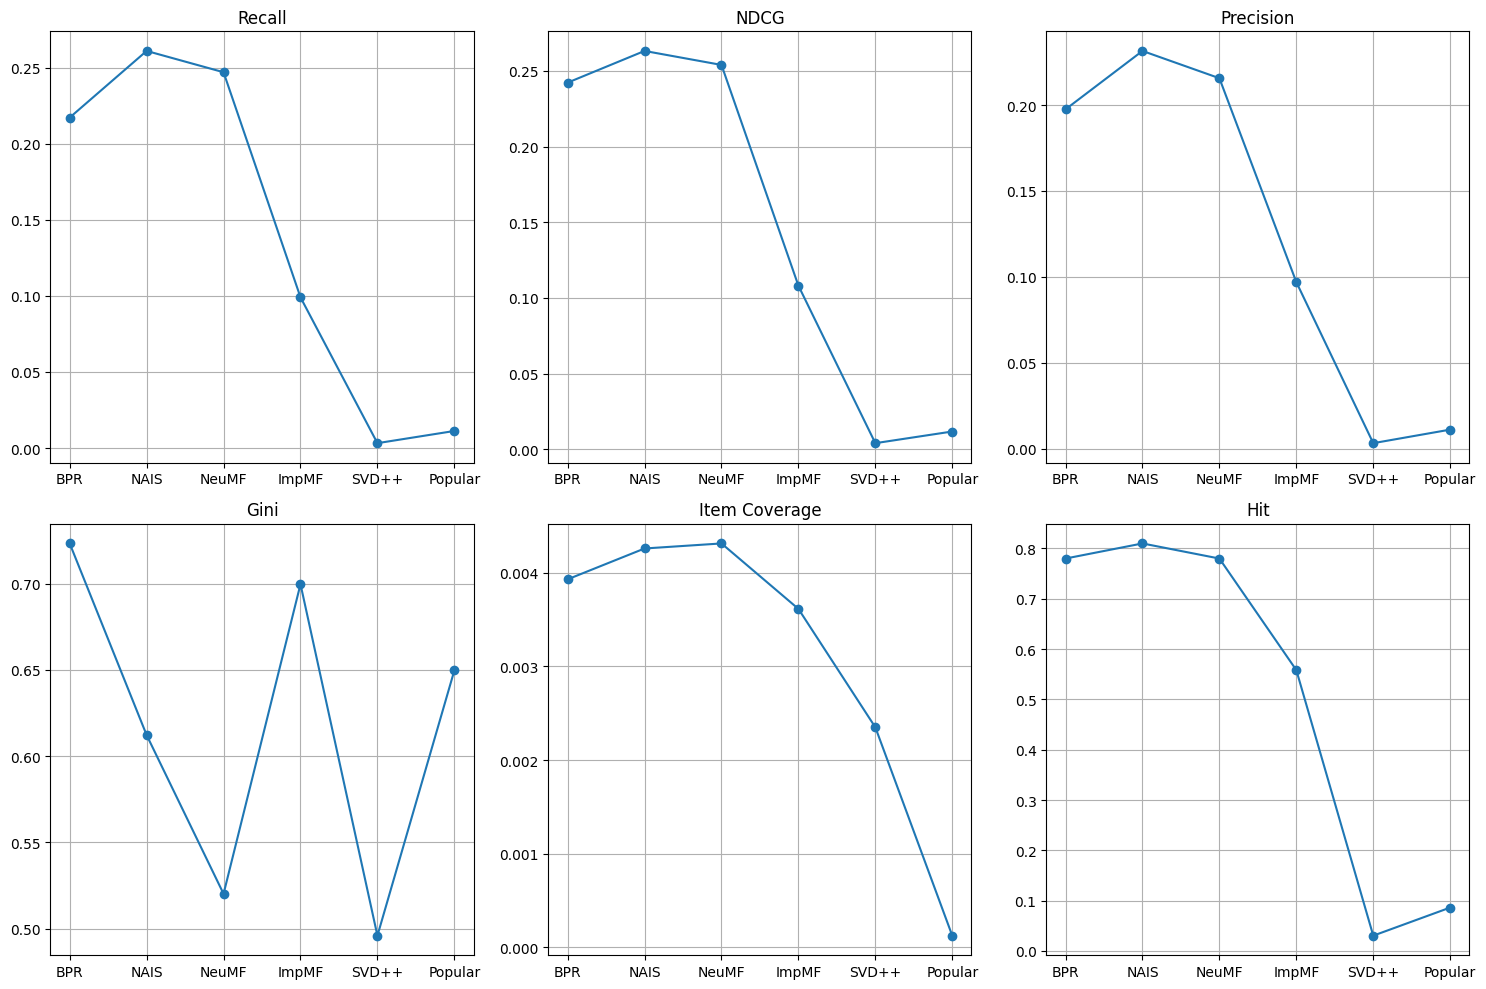

In [2]:
# plot metric performance for different models optimised for gini index

#define paths to model results:
bpr = '../recBole/BPR/results/gini40.json'
nais = '../recBole/NAIS/results/gini100.json'
neumf = '../recBole/NeuMF/results/gini90.json'
impmf = 'evaluation/results_optImpMF100k.json'
svdbiased = 'evaluation/results_optSVDBiased100k.json'
pop = 'evaluation/results_popular100k.json'

models = ['BPR', 'NAIS', 'NeuMF', 'ImpMF', 'SVD++', 'Popular']

recall = []
ndcg = []
precision = []
gini = []
item_coverage = []
hit = []

#load the results
for path in [bpr, nais, neumf, impmf, svdbiased, pop]:
    with open(path, 'r') as f:
        data = json.load(f)
        print(data)
        recall.append(data['recall@10'])
        ndcg.append(data['ndcg@10'])
        precision.append(data['precision@10'])
        gini.append(data['giniindex'])
        item_coverage.append(data['itemcoverage'])
        hit.append(data['hit@10'])

# Convert to numpy arrays for plotting
models = np.array(models)
recall = np.array(recall)
ndcg = np.array(ndcg)
precision = np.array(precision)
gini = np.array(gini)
item_coverage = np.array(item_coverage)
hit = np.array(hit)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# Plot each metric
metrics = [recall, ndcg, precision, gini, item_coverage, hit]
metric_names = ['Recall', 'NDCG', 'Precision', 'Gini', 'Item Coverage', 'Hit']
for i, ax in enumerate(axs.flat):
    ax.plot(models, metrics[i], marker='o')
    ax.set_title(metric_names[i])
    ax.grid(True)

plt.tight_layout()
plt.show()

{'recall@10': 0.2273, 'giniindex': 0.7666806890975, 'ndcg@10': 0.251, 'hit@10': 0.83, 'precision@10': 0.2124, 'itemcoverage': 0.0038590540323358733}
{'recall@10': 0.257112, 'giniindex': 0.610234, 'ndcg@10': 0.2712, 'hit@10': 0.812, 'precision@10': 0.2019, 'itemcoverage': 0.004192327125}
{'recall@10': 0.262369, 'giniindex': 0.561783, 'ndcg@10': 0.273516, 'hit@10': 0.82, 'precision@10': 0.291264, 'itemcoverage': 0.0041252335}
{'recall@10': 0.09909566666666668, 'precision@10': 0.09692100000000002, 'hit@10': 0.5582799911499023, 'ndcg@10': 0.10809291087724168, 'giniUser': 1.6996314189263973e-05, 'giniindex': 0.6996, 'itemcoverage': 0.003614}
{'recall@10': 0.003203444444444445, 'precision@10': 0.003141, 'hit@10': 0.030409999191761017, 'ndcg@10': 0.0040591694577996615, 'giniUser': 1.4958594999999999e-05, 'giniindex': 0.4959, 'itemcoverage': 0.00234951}
{'recall@10': 0.011220694444444446, 'precision@10': 0.011027, 'hit@10': 0.08626999706029892, 'ndcg@10': 0.011764798000492795, 'giniUser': 1.64

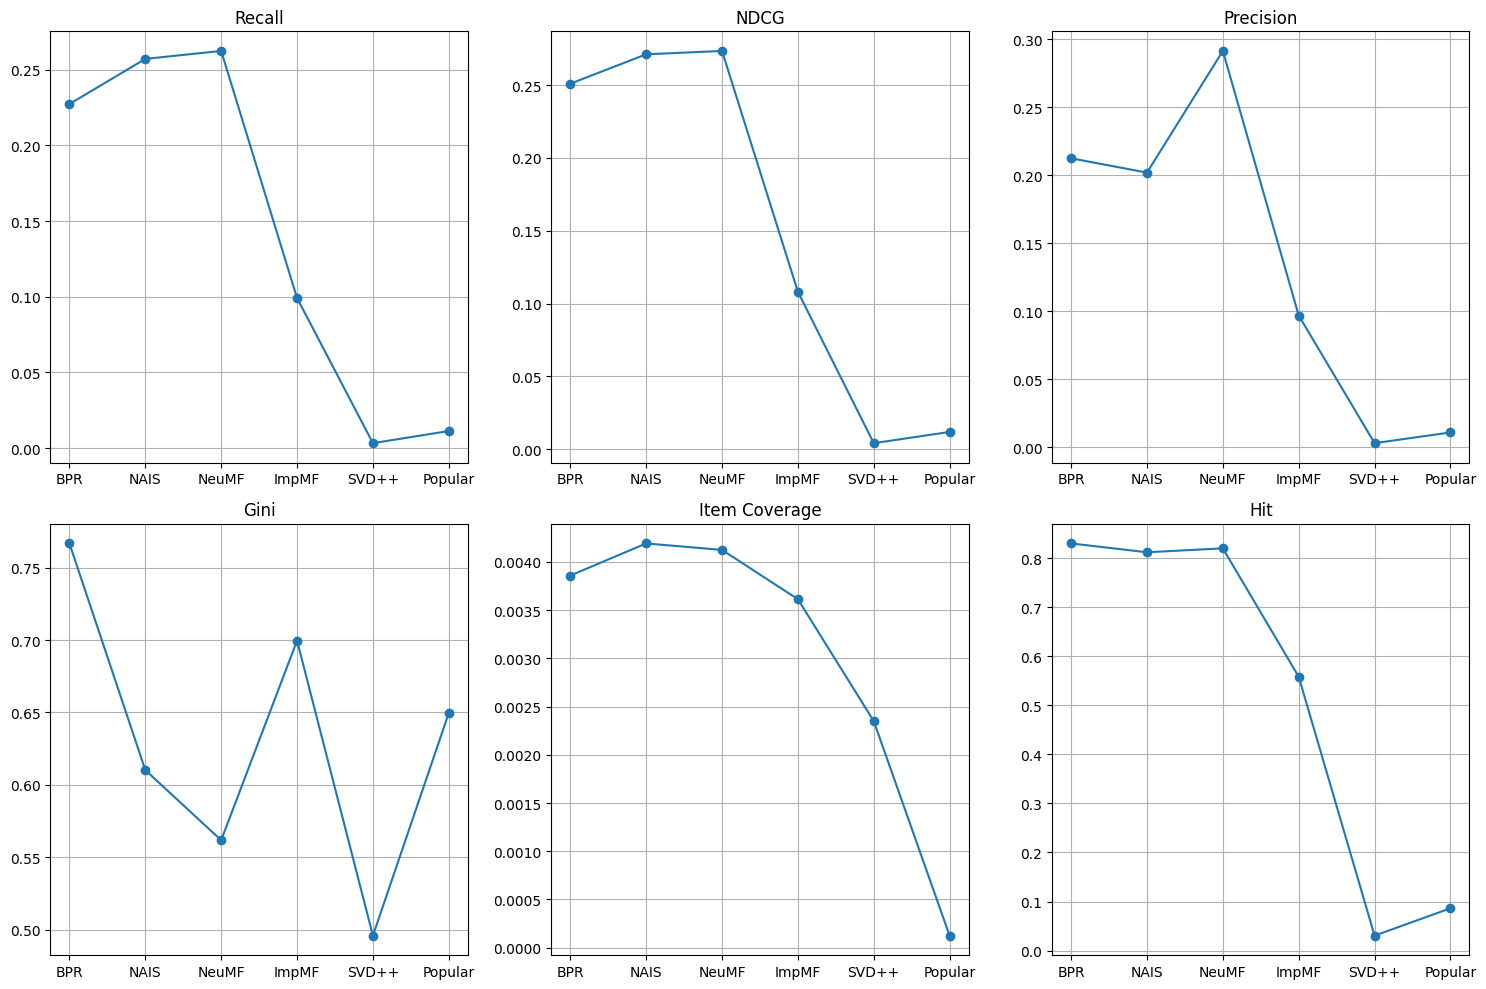

In [3]:
# plot metric performance for different models optimised for gini index

#define paths to model results:
bpr = '../recBole/BPR/results/precision150.json'
nais = '../recBole/NAIS/results/precision150.json'
neumf = '../recBole/NeuMF/results/precision150.json'
impmf = 'evaluation/results_optImpMF100k.json'
svdbiased = 'evaluation/results_optSVDBiased100k.json'
pop = 'evaluation/results_popular100k.json'

models = ['BPR', 'NAIS', 'NeuMF', 'ImpMF', 'SVD++', 'Popular']

recall = []
ndcg = []
precision = []
gini = []
item_coverage = []
hit = []

#load the results
for path in [bpr, nais, neumf, impmf, svdbiased, pop]:
    with open(path, 'r') as f:
        data = json.load(f)
        print(data)
        recall.append(data['recall@10'])
        ndcg.append(data['ndcg@10'])
        precision.append(data['precision@10'])
        gini.append(data['giniindex'])
        item_coverage.append(data['itemcoverage'])
        hit.append(data['hit@10'])

# Convert to numpy arrays for plotting
models = np.array(models)
recall = np.array(recall)
ndcg = np.array(ndcg)
precision = np.array(precision)
gini = np.array(gini)
item_coverage = np.array(item_coverage)
hit = np.array(hit)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# Plot each metric
metrics = [recall, ndcg, precision, gini, item_coverage, hit]
metric_names = ['Recall', 'NDCG', 'Precision', 'Gini', 'Item Coverage', 'Hit']
for i, ax in enumerate(axs.flat):
    ax.plot(models, metrics[i], marker='o')
    ax.set_title(metric_names[i])
    ax.grid(True)

plt.tight_layout()
plt.show()

BPR** {'recall@10': 0.2273, 'giniindex': 0.7666806890975, 'ndcg@10': 0.251, 'hit@10': 0.83, 'precision@10': 0.2124, 'itemcoverage': 0.0038590540323358733}
NAIS** {'recall@10': 0.257112, 'giniindex': 0.630234, 'ndcg@10': 0.2712, 'hit@10': 0.812, 'precision@10': 0.2019, 'itemcoverage': 0.004192327125}
NeuMF** {'recall@10': 0.262369, 'giniindex': 0.561783, 'ndcg@10': 0.273516, 'hit@10': 0.82, 'precision@10': 0.291264, 'itemcoverage': 0.0041252335}
BPR {'recall@10': 0.2173, 'giniindex': 0.723215043, 'ndcg@10': 0.2422, 'hit@10': 0.78, 'precision@10': 0.1975, 'itemcoverage': 0.00392968258733}
NAIS {'recall@10': 0.261112, 'giniindex': 0.61215, 'ndcg@10': 0.26314, 'hit@10': 0.81, 'precision@10': 0.2315, 'itemcoverage': 0.0042590162}
NeuMF {'recall@10': 0.247112, 'giniindex': 0.5201524, 'ndcg@10': 0.2539, 'hit@10': 0.78, 'precision@10': 0.21562, 'itemcoverage': 0.00431285575}
ImpMF {'recall@10': 0.09909566666666668, 'precision@10': 0.09692100000000002, 'hit@10': 0.5582799911499023, 'ndcg@10': 0

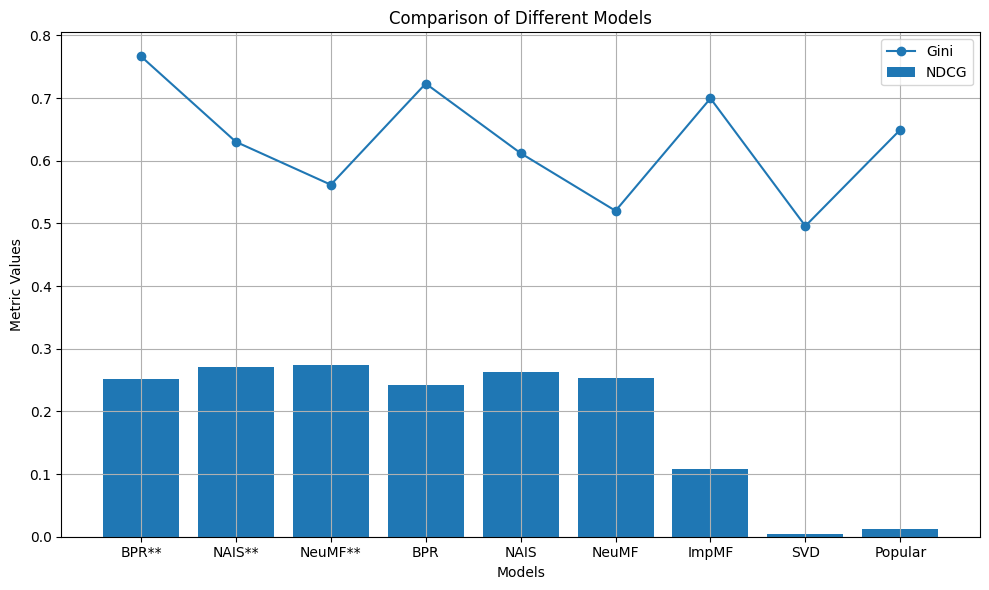

In [8]:
# plot metric performance for different models optimised for gini index

#precision optimised models
bpr_precision = '../recBole/BPR/results/precision150.json'
nais_precision = '../recBole/NAIS/results/precision150.json'
neumf_precision = '../recBole/NeuMF/results/precision150.json'

#gini optimised models:
bpr_gini = '../recBole/BPR/results/gini40.json'
nais_gini = '../recBole/NAIS/results/gini100.json'
neumf_gini = '../recBole/NeuMF/results/gini90.json'

#lenskit models
impmf = 'evaluation/results_optImpMF100k.json'
svdbiased = 'evaluation/results_optSVDBiased100k.json'
pop = 'evaluation/results_popular100k.json'

models = ['BPR**', 'NAIS**', 'NeuMF**', 'BPR', 'NAIS', 'NeuMF', 'ImpMF', 'SVD', 'Popular']

recall = []
ndcg = []
precision = []
gini = []
item_coverage = []
hit = []

#load the results
for i, path in enumerate([bpr_precision, nais_precision, neumf_precision, bpr_gini, nais_gini, neumf_gini, impmf, svdbiased, pop]):
    with open(path, 'r') as f:
        data = json.load(f)
        print(models[i],data)
        recall.append(data['recall@10'])
        ndcg.append(data['ndcg@10'])
        precision.append(data['precision@10'])
        gini.append(data['giniindex'])
        item_coverage.append(data['itemcoverage'])
        hit.append(data['hit@10'])

# Convert to numpy arrays for plotting
models = np.array(models)
recall = np.array(recall)
ndcg = np.array(ndcg)
precision = np.array(precision)
gini = np.array(gini)
item_coverage = np.array(item_coverage)
hit = np.array(hit)

# # Create subplots
# fig, axs = plt.subplots(2, 3, figsize=(15,10))

# # Plot each metric
# metrics = [recall, ndcg, precision, gini, item_coverage, hit]
# metric_names = ['Recall', 'NDCG', 'Precision', 'Gini', 'Item Coverage', 'Hit']
# for i, ax in enumerate(axs.flat):
#     ax.plot(models, metrics[i], marker='o')
#     ax.set_title(metric_names[i])
#     ax.grid(True)
# Create the plot
plt.figure(figsize=(10,6))

# Plot each metric
#plt.plot(models, recall, marker='o', label='Recall')
#plt.plot(models, ndcg, marker='o', label='NDCG')
#plt.plot(models, precision, marker='o', label='Precision')
plt.plot(models, gini, marker='o', label='Gini')
plt.bar(models, ndcg, label='NDCG')
#plt.plot(models, item_coverage, marker='o', label='Item Coverage')
#plt.plot(models, hit, marker='o', label='Hit')

plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.title('Comparison of Different Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


    Models   NDCG@10  Gini Index   Hit@10
0    BPR**  0.251000    0.766681  0.83000
1   NAIS**  0.271200    0.630234  0.81200
2  NeuMF**  0.273516    0.561783  0.82000
3      BPR  0.242200    0.723215  0.78000
4     NAIS  0.263140    0.612150  0.81000
5    NeuMF  0.253900    0.520152  0.78000
6    ImpMF  0.108093    0.699600  0.55828
7      SVD  0.004059    0.495900  0.03041
8  Popular  0.011765    0.649600  0.08627


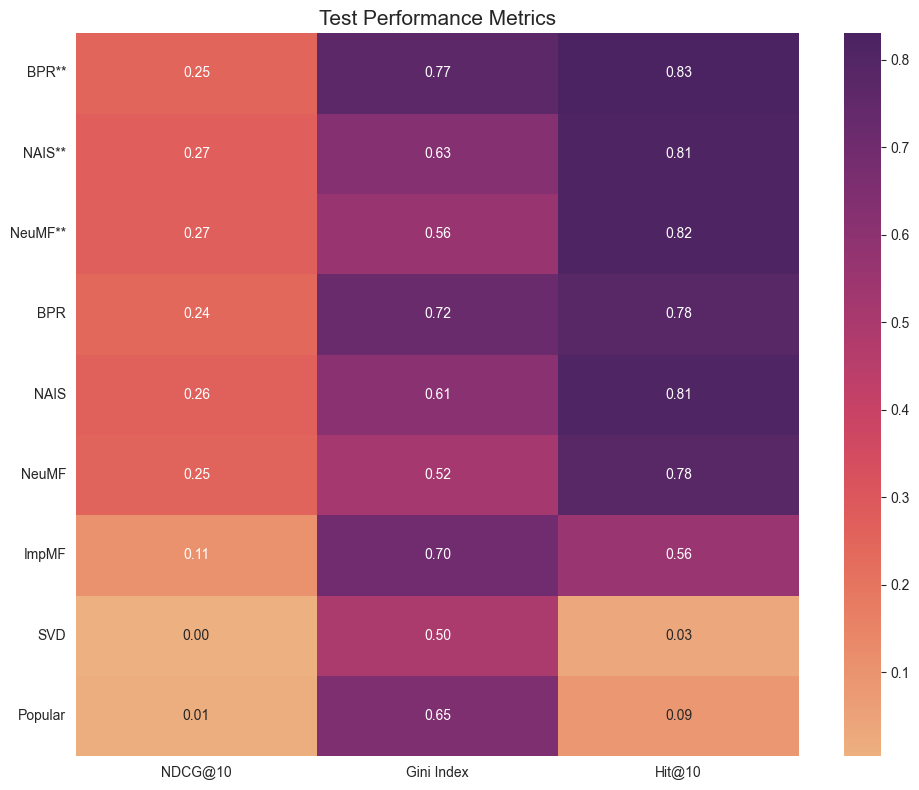

In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for the metrics
data = {
    'Models': models,
    'recall': recall,
    'ndcg': ndcg,
    'precision': precision,
    'gini': gini,
    'item_coverage': item_coverage,
    'hit': hit
}

data = {
    'Models': models,
    'NDCG@10': ndcg,
    'Gini Index': gini,
    'Hit@10': hit,
}

df = pd.DataFrame(data)
print(df)
df.set_index('Models', inplace=True)

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df, annot=True, cmap='flare', fmt=".2f")

plt.title('Test Performance Metrics', fontsize=15)
#plt.xlabel('Metrics', fontsize=15)
plt.ylabel(None, fontsize=10, rotation=0)
plt.yticks(rotation=0, fontsize=10) 
plt.xticks(fontsize=10)
plt.savefig('../visualisations/heatmap.png')
plt.tight_layout()
plt.show()



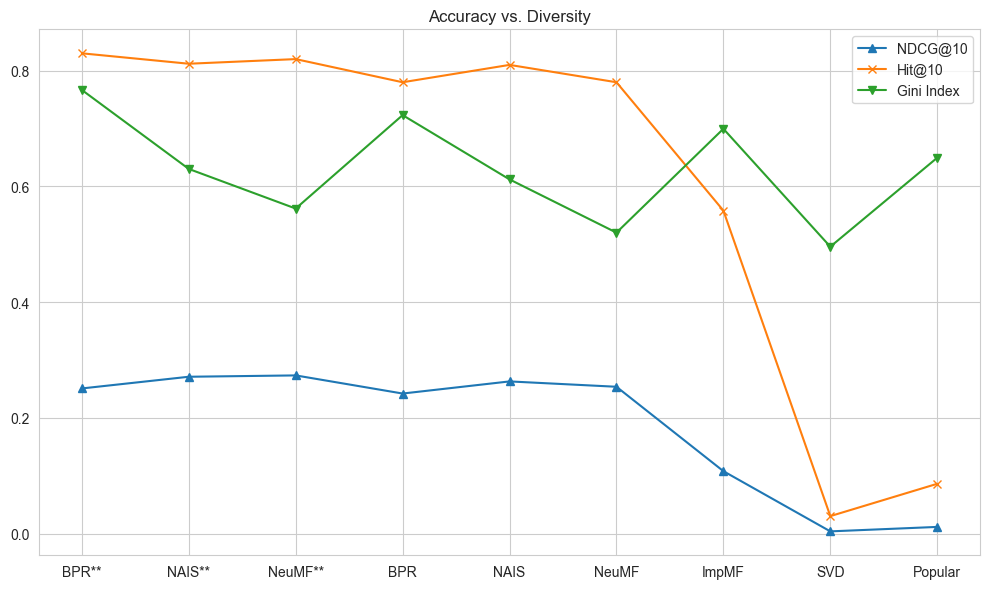

In [56]:
plt.figure(figsize=(10,6))
plt.plot(models, ndcg, marker="^", label='NDCG@10')
plt.plot(models, hit, marker='x', label='Hit@10')   
plt.plot(models, gini, marker='v', label='Gini Index')
#plt.plot(models, item_coverage, marker='o', label='Item Coverage')
#plt.ylabel('Metric Values')
plt.title('Accuracy vs. Diversity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../visualisations/accuracy_diversity.png')
plt.show()


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5]


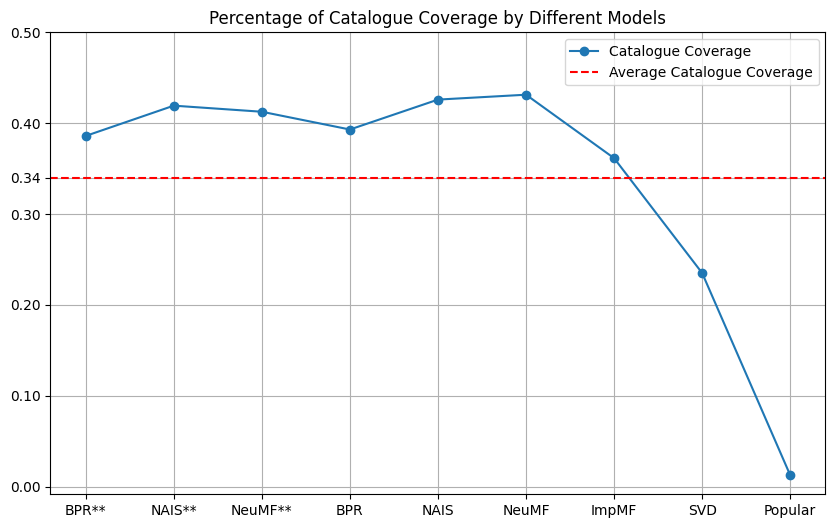

In [7]:
plt.figure(figsize=(10,6))
plt.plot(models, item_coverage*100, marker='o', label='Catalogue Coverage')
avg = (np.mean(item_coverage)*100).round(2)
plt.axhline(y=avg, color='r', linestyle='--', label='Average Catalogue Coverage')
yticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
print(yticks)
plt.yticks(yticks + [avg])
plt.title('Percentage of Catalogue Coverage by Different Models')
plt.legend()
plt.grid(True)
plt.savefig('../visualisations/catalogue_coverage.png')
plt.show()
